In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gc

import numpy
import torch
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.ToImage(),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True)
])

train = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

((50000, 3, 32, 32), (10000, 3, 32, 32))

In [3]:
import tqdm

def make_point_cloud_(image: numpy.ndarray) -> numpy.ndarray:
    r, g, b = image[0, :, :], image[1, :, :], image[2, :, :]
    x = numpy.indices(r.shape)[0].flatten()
    y = numpy.indices(r.shape)[1].flatten()

    return numpy.vstack([ x, y, r.flatten(), g.flatten(), b.flatten() ]).transpose()

def make_point_clouds_(
    images: numpy.ndarray
):
    return numpy.array([
        make_point_cloud_(image)
        for image in tqdm.tqdm(images)
    ])


In [4]:
train_pointclouds = make_point_clouds_(32 * train_images)
test_pointclouds = make_point_clouds_(32 * test_images)

train_pointclouds.shape, test_pointclouds.shape

100%|██████████| 10000/10000 [00:00<00:00, 35873.43it/s]


((50000, 1024, 5), (10000, 1024, 5))

In [ ]:
import cvtda.topology

pointclouds_to_diagrams = cvtda.topology.PointCloudsToDiagrams(
    homology_dimensions = [ 0, 1 ]
)

train_diagrams = pointclouds_to_diagrams.fit_transform(train_pointclouds)
test_diagrams = pointclouds_to_diagrams.transform(test_pointclouds)

Fitting the persistence
Fitting complete
Calculating the persistence


  1%|          | 480/50000 [00:51<1:44:23,  7.91it/s]

In [45]:
train_diagrams.shape, test_diagrams.shape

((50000, 1023, 3), (10000, 1023, 3))

In [51]:
diagrams_to_features = cvtda.topology.DiagramsToFeatures(batch_size = 256)

train_features = diagrams_to_features.fit_transform(train_diagrams)
test_features = diagrams_to_features.transform(test_diagrams)

train_features.shape, test_features.shape

Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:05<00:00,  2.65s/it]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:09<00:00,  3.07s/it]


Fitting complete


Batch: 100%|██████████| 40/40 [00:21<00:00,  1.82it/s]


((50000, 130), (10000, 130))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000002DB53356BF0>
Input to LazyLinear: 130
Parameters: 78058


100%|██████████| 25/25 [00:28<00:00,  1.14s/it, loss=1.12e+5, val_acc=0.102]


Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
Fitting <catboost.core.CatBoostClassifier object at 0x000002DB53356D10>
Learning rate set to 0.309284
0:	learn: 2.1645383	total: 74.5ms	remaining: 29.7s
1:	learn: 2.0969272	total: 82.9ms	remaining: 16.5s
2:	learn: 2.0570709	total: 90.4ms	remaining: 12s
3:	learn: 2.0344281	total: 97.5ms	remaining: 9.65s
4:	learn: 2.0168137	total: 105ms	remaining: 8.29s
5:	learn: 2.0040044	total: 112ms	remaining: 7.34s
6:	learn: 1.9940958	total: 119ms	remaining: 6.71s
7:	learn: 1.9876152	total: 126ms	remaining: 6.16s
8:	learn: 1.9805714	total: 134ms	remaining: 5.8s
9:	learn: 1.9765425	total: 140ms	remaining: 5.46s
10:	learn: 1.9725391	total: 147ms	remaining: 5.19s
11:	learn: 1.9698878	total: 153ms	remaining: 4.96s
12:	learn: 1.9660939	total: 161ms	remaining: 4.79s
13:	learn: 1.9633706	total: 168ms	remaining: 4.63s
14:	learn: 1.9612520	total: 175ms	remaining: 4.48s
15:	learn: 

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning:

[17:40:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.




,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.2689,0.4489,0.5784,0.6786,0.7708,0.8403,0.8914,0.9384,0.9722,0.717944,0.254891,0.2689,0.255608
1,RandomForestClassifier,0.2657,0.4472,0.5746,0.6802,0.7673,0.8427,0.8954,0.9395,0.9731,0.718701,0.254855,0.2657,0.257422
2,NNClassifier,0.1021,0.2115,0.3205,0.4312,0.5306,0.6251,0.7261,0.8216,0.9190,0.559410,0.021403,0.1021,0.022441
3,HistGradientBoostingClassifier,0.2857,0.4670,0.6047,0.7029,0.7932,0.8640,0.9165,0.9555,0.9820,0.738259,0.277328,0.2857,0.259048
4,CatBoostClassifier,0.2842,0.4770,0.6156,0.7165,0.8003,0.8693,0.9167,0.9558,0.9828,0.745992,0.271519,0.2842,0.271564
5,XGBClassifier,0.2849,0.4724,0.6076,0.7104,0.7985,0.8684,0.9165,0.9568,0.9834,0.742205,0.267589,0.2849,0.262727


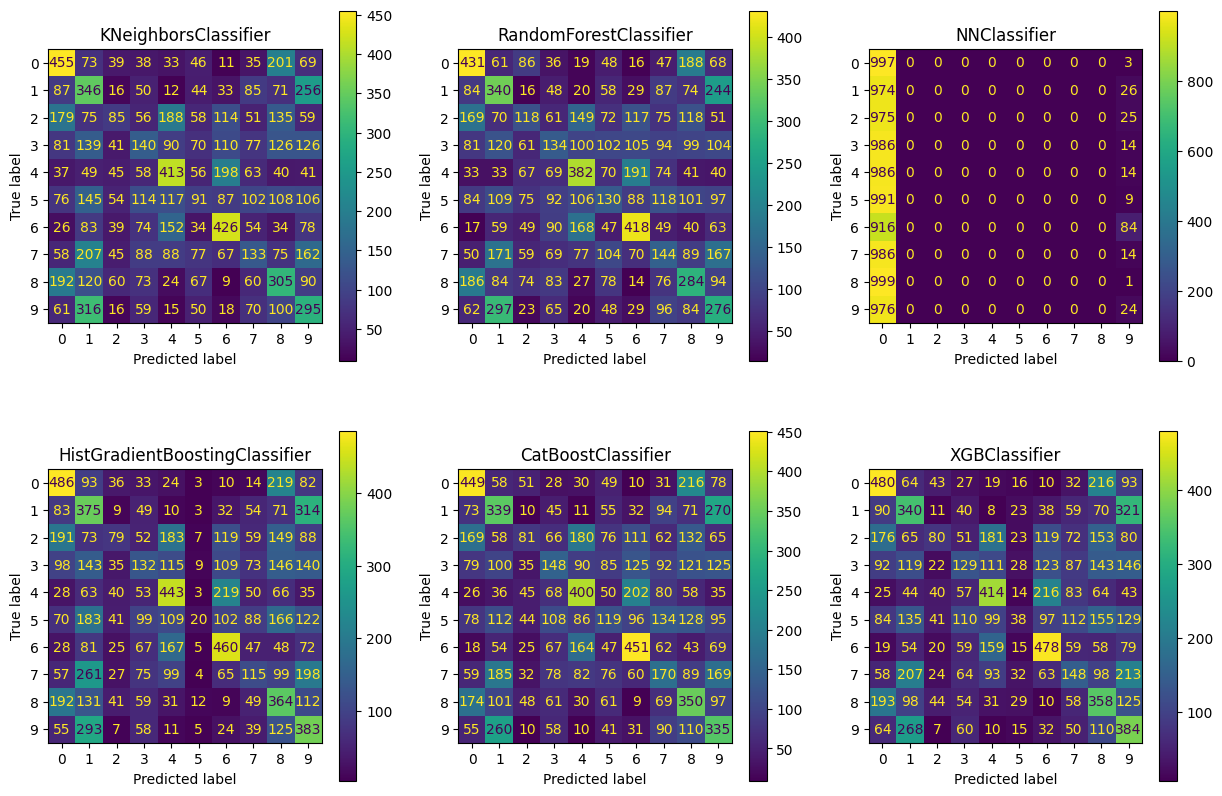

In [52]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)